In [1]:
!pip install -U -q gdown ultralytics

## Finetune on the ships dataset

In [2]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

# 🗂️Dataset Overview
---

## Visualizing Sample Images with Corresponding Annotations

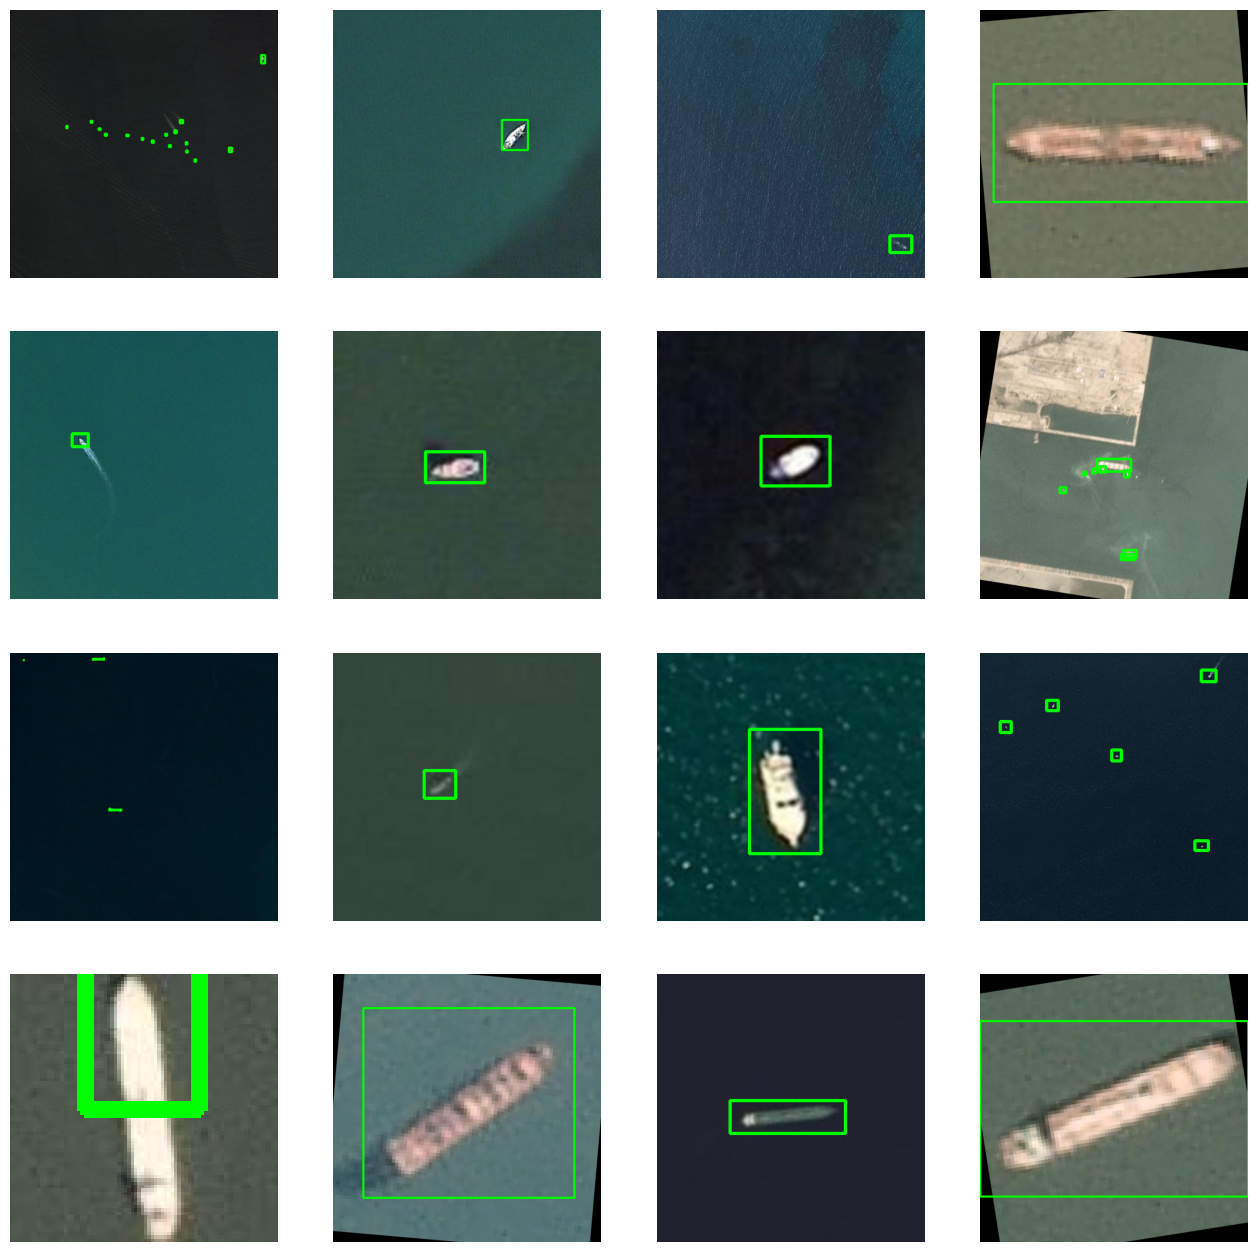

In [3]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images"
train_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels"

test_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images"
test_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/labels"

val_images = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/images"
val_labels = "/kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

## Image Metadata

In [4]:
# Load an image using OpenCV
image = cv2.imread("/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images/02e39612d_jpg.rf.cc5483bb711f080d12b644ff62cf977a.jpg")

# Get the size of the image
height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 768x768 and 3 channels.


# 🚀Model Training
---

In [5]:
# # Loading a pretrained model
# # Loading the best weights
# model = YOLO('/kaggle/input/best-pt2/best (2).pt')

# # Training the model
# model.train(data = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml',
#             epochs = 100,
#             imgsz = height,
#             seed = 42,
#             batch = 16)

In [6]:
# Loading a pretrained model
# Loading the best weights
model = YOLO('/kaggle/input/coco-dior-finetuneships-29epochs/best (10).pt')

# Training the model
model.train(data = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml',
            epochs = 71,
            imgsz = height,
            seed = 42,
            batch = 16)

Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/input/coco-dior-finetuneships-29epochs/best (10).pt, data=/kaggle/input/ships-in-aerial-images/ships-aerial-images/data.yaml, epochs=71, time=None, patience=100, batch=16, imgsz=768, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]
2024-06-30 07:59:48,304	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-06-30 07:59:49,111	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.4MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/labels... 9697 images, 351 backgrounds, 2 corrupt: 100%|██████████| 9697/9697 [00:43<00:00, 222.59it/s]

train: WARNING ⚠️ /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-20071740708637_33-73029905538088_png.rf.330efa80ecbf49d6ceac7071288d64b4.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0249]
train: WARNING ⚠️ /kaggle/input/ships-in-aerial-images/ships-aerial-images/train/images/1__20180714_180427_1029__-118-21100741654266_33-732092454738826_png.rf.7243f2b58b505e51950850f4b26081ba.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0079]


train: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 709, len(boxes) = 19454. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid/labels... 2165 images, 68 backgrounds, 0 corrupt: 100%|██████████| 2165/2165 [00:09<00:00, 231.72it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/valid is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 172, len(boxes) = 3720. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 768 train, 768 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 71 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/71      4.52G      1.295      1.002      1.282         74        768: 100%|██████████| 606/606 [02:23<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:17<00:00,  3.93it/s]

                   all       2165       3720       0.56      0.479      0.486      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/71      6.63G      1.288     0.9923      1.275         62        768: 100%|██████████| 606/606 [02:16<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.27it/s]


                   all       2165       3720      0.585      0.479      0.485      0.282

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/71      4.93G       1.34      1.051      1.301         55        768: 100%|██████████| 606/606 [02:15<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.30it/s]


                   all       2165       3720      0.548      0.466      0.461      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/71      5.08G      1.393      1.104      1.328         34        768: 100%|██████████| 606/606 [02:16<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.32it/s]


                   all       2165       3720      0.511      0.449      0.443      0.254

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/71      4.38G      1.386      1.103      1.331         47        768: 100%|██████████| 606/606 [02:16<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.26it/s]


                   all       2165       3720       0.57      0.483      0.472      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/71      4.59G      1.379      1.103      1.332         26        768: 100%|██████████| 606/606 [02:18<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:17<00:00,  3.95it/s]

                   all       2165       3720      0.585       0.43      0.452      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/71      5.99G      1.392      1.106      1.333         24        768: 100%|██████████| 606/606 [02:15<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.31it/s]


                   all       2165       3720      0.587      0.461      0.465      0.267

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/71       5.1G       1.38      1.091      1.327         34        768: 100%|██████████| 606/606 [02:14<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.35it/s]

                   all       2165       3720      0.541      0.458      0.458      0.257



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/71      5.47G       1.37      1.084      1.332         50        768: 100%|██████████| 606/606 [02:14<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.27it/s]


                   all       2165       3720      0.521      0.481      0.454       0.26

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/71      4.25G      1.365      1.086      1.318         89        768: 100%|██████████| 606/606 [02:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.30it/s]


                   all       2165       3720       0.55      0.492      0.469      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/71      4.34G      1.362      1.069      1.319         35        768: 100%|██████████| 606/606 [02:15<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.28it/s]


                   all       2165       3720      0.557      0.471      0.475      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/71      5.67G      1.372      1.072      1.329         30        768: 100%|██████████| 606/606 [02:14<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.33it/s]

                   all       2165       3720      0.557       0.46      0.458      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/71      5.52G      1.357      1.057      1.309         24        768: 100%|██████████| 606/606 [02:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.36it/s]


                   all       2165       3720       0.57      0.466      0.476      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/71      4.81G      1.359       1.06       1.31         43        768: 100%|██████████| 606/606 [02:13<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.28it/s]


                   all       2165       3720      0.551      0.477      0.473      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/71      6.12G      1.344      1.046      1.306         35        768: 100%|██████████| 606/606 [02:15<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.29it/s]


                   all       2165       3720      0.519      0.449      0.448      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/71      6.02G      1.347      1.047      1.296         46        768: 100%|██████████| 606/606 [02:15<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.28it/s]


                   all       2165       3720      0.544      0.488      0.479      0.275

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/71       4.4G      1.334      1.035      1.302         46        768: 100%|██████████| 606/606 [02:15<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.42it/s]


                   all       2165       3720      0.565      0.471      0.475      0.276

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/71         5G      1.349      1.051      1.306         25        768: 100%|██████████| 606/606 [02:17<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.32it/s]


                   all       2165       3720      0.561       0.47       0.48      0.283

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/71      5.46G      1.329      1.029      1.299         25        768: 100%|██████████| 606/606 [02:12<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.39it/s]


                   all       2165       3720      0.577      0.477       0.49      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/71      5.14G      1.315      1.027      1.292         21        768: 100%|██████████| 606/606 [02:12<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.40it/s]


                   all       2165       3720      0.547      0.493       0.48      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/71      4.85G      1.332      1.021      1.293         48        768: 100%|██████████| 606/606 [02:12<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.36it/s]


                   all       2165       3720      0.533      0.473      0.475      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/71      4.67G      1.313     0.9953      1.288         30        768: 100%|██████████| 606/606 [02:12<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.37it/s]


                   all       2165       3720      0.599      0.484      0.492      0.291

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/71      4.86G      1.312      1.005      1.284        131        768: 100%|██████████| 606/606 [02:13<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.34it/s]


                   all       2165       3720      0.599      0.472      0.493      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/71      4.02G      1.308     0.9989      1.285         40        768: 100%|██████████| 606/606 [02:15<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.31it/s]


                   all       2165       3720      0.577      0.462      0.488       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/71      5.12G      1.286     0.9799      1.273         33        768: 100%|██████████| 606/606 [02:15<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.33it/s]


                   all       2165       3720       0.56      0.489      0.485      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/71      4.62G      1.293     0.9974      1.274         27        768: 100%|██████████| 606/606 [02:14<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.28it/s]


                   all       2165       3720      0.557      0.491      0.484      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/71      6.15G       1.29     0.9749      1.267         29        768: 100%|██████████| 606/606 [02:14<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.28it/s]


                   all       2165       3720      0.552       0.48      0.483      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/71      4.76G      1.285     0.9849      1.274         36        768: 100%|██████████| 606/606 [02:14<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.34it/s]


                   all       2165       3720      0.563      0.478      0.491      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/71         5G      1.281     0.9827      1.261         29        768: 100%|██████████| 606/606 [02:14<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.37it/s]


                   all       2165       3720      0.543        0.5      0.489      0.293

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/71      5.35G      1.282     0.9785      1.263         21        768: 100%|██████████| 606/606 [02:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.34it/s]


                   all       2165       3720      0.564      0.484      0.492      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/71      4.73G      1.272     0.9644      1.251         39        768: 100%|██████████| 606/606 [02:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.32it/s]

                   all       2165       3720      0.568      0.516      0.502      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/71      6.33G      1.277     0.9623      1.261         31        768: 100%|██████████| 606/606 [02:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.35it/s]


                   all       2165       3720      0.577      0.493      0.498      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/71      5.78G       1.29      0.965      1.268         31        768: 100%|██████████| 606/606 [02:14<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.27it/s]


                   all       2165       3720      0.554      0.506      0.492      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/71      5.17G      1.278     0.9608       1.25         52        768: 100%|██████████| 606/606 [02:13<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.34it/s]


                   all       2165       3720      0.554      0.504      0.492      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/71      4.44G      1.268     0.9507      1.252         36        768: 100%|██████████| 606/606 [02:15<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.35it/s]


                   all       2165       3720      0.575      0.496      0.504      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/71      5.42G      1.272      0.948      1.256         22        768: 100%|██████████| 606/606 [02:15<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.31it/s]


                   all       2165       3720      0.583      0.508      0.504      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/71       5.7G      1.261     0.9398      1.251         49        768: 100%|██████████| 606/606 [02:13<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.26it/s]


                   all       2165       3720      0.579      0.503      0.506      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/71      5.34G      1.247     0.9474      1.249         42        768: 100%|██████████| 606/606 [02:16<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.28it/s]


                   all       2165       3720      0.571      0.484      0.498      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/71      3.57G      1.239      0.929      1.249         30        768: 100%|██████████| 606/606 [02:15<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.33it/s]


                   all       2165       3720      0.567      0.492      0.501      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/71      4.56G      1.245     0.9385      1.245         43        768: 100%|██████████| 606/606 [02:15<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.33it/s]


                   all       2165       3720       0.57      0.496      0.503      0.302

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/71      4.72G      1.241     0.9272      1.243         47        768: 100%|██████████| 606/606 [02:15<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.39it/s]


                   all       2165       3720      0.579      0.504       0.51      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/71      4.07G      1.235      0.916      1.237         27        768: 100%|██████████| 606/606 [02:14<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.33it/s]


                   all       2165       3720      0.567      0.509      0.506      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/71      4.61G      1.219     0.9115      1.234         35        768: 100%|██████████| 606/606 [02:11<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.44it/s]


                   all       2165       3720      0.569      0.513      0.509      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/71      5.08G      1.235     0.9095      1.234         69        768: 100%|██████████| 606/606 [02:11<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.42it/s]


                   all       2165       3720      0.565      0.504      0.508       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/71      5.92G      1.232     0.9036      1.222         41        768: 100%|██████████| 606/606 [02:11<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.37it/s]


                   all       2165       3720      0.571      0.516      0.509       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/71      5.63G      1.222     0.8982      1.233         36        768: 100%|██████████| 606/606 [02:11<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.41it/s]


                   all       2165       3720      0.568      0.519       0.51       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/71      4.91G      1.212     0.9031      1.234         46        768: 100%|██████████| 606/606 [02:12<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.40it/s]


                   all       2165       3720      0.566      0.527       0.51      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/71      5.15G      1.223     0.8925      1.221         36        768: 100%|██████████| 606/606 [02:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.34it/s]


                   all       2165       3720      0.573      0.524      0.512       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/71         5G       1.21     0.8904      1.222         68        768: 100%|██████████| 606/606 [02:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.40it/s]


                   all       2165       3720      0.568      0.529      0.512       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/71      5.73G      1.204      0.882      1.217         32        768: 100%|██████████| 606/606 [02:14<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.34it/s]


                   all       2165       3720      0.566      0.524      0.513      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/71      5.77G      1.203     0.8905      1.219         81        768: 100%|██████████| 606/606 [02:15<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.38it/s]


                   all       2165       3720      0.578      0.517      0.516      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/71      6.27G      1.205      0.874      1.216         55        768: 100%|██████████| 606/606 [02:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.34it/s]

                   all       2165       3720      0.571      0.533      0.515      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/71      4.52G      1.194     0.8733      1.216         40        768: 100%|██████████| 606/606 [02:13<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.36it/s]


                   all       2165       3720      0.568      0.532      0.515      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/71      4.93G      1.181     0.8571      1.204         32        768: 100%|██████████| 606/606 [02:16<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.37it/s]


                   all       2165       3720      0.576      0.527      0.518      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/71      4.61G      1.188     0.8601      1.212         58        768: 100%|██████████| 606/606 [02:14<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.34it/s]


                   all       2165       3720      0.572      0.529      0.516      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/71      4.97G      1.184     0.8557      1.203         43        768: 100%|██████████| 606/606 [02:14<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.29it/s]


                   all       2165       3720      0.569      0.528      0.512      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/71      5.88G      1.172     0.8485      1.201         31        768: 100%|██████████| 606/606 [02:14<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.37it/s]


                   all       2165       3720      0.558      0.533      0.509      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/71      4.32G      1.165     0.8381        1.2         59        768: 100%|██████████| 606/606 [02:14<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.37it/s]


                   all       2165       3720      0.559      0.533       0.51      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/71      5.09G      1.175     0.8515      1.202         34        768: 100%|██████████| 606/606 [02:16<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.29it/s]

                   all       2165       3720       0.56       0.53      0.513      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/71      4.98G      1.161      0.838       1.19         26        768: 100%|██████████| 606/606 [02:16<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.31it/s]


                   all       2165       3720      0.564      0.533      0.516      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      61/71      5.51G      1.154     0.8395      1.192         40        768: 100%|██████████| 606/606 [02:14<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.32it/s]


                   all       2165       3720       0.57      0.523      0.512      0.313
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      62/71      5.04G      1.128     0.7762      1.165         69        768: 100%|██████████| 606/606 [02:09<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.37it/s]


                   all       2165       3720      0.565      0.525      0.512      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      63/71      4.71G      1.111     0.7596      1.148         15        768: 100%|██████████| 606/606 [02:05<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.32it/s]


                   all       2165       3720      0.563      0.522      0.513      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      64/71      5.32G      1.114     0.7528      1.154         24        768: 100%|██████████| 606/606 [02:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.35it/s]


                   all       2165       3720      0.565      0.524      0.513      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      65/71       5.6G      1.097     0.7454      1.143         12        768: 100%|██████████| 606/606 [02:05<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.38it/s]


                   all       2165       3720       0.57      0.521      0.515      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      66/71      5.52G      1.092     0.7414      1.143         28        768: 100%|██████████| 606/606 [02:06<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.35it/s]


                   all       2165       3720      0.568      0.527      0.515      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      67/71      5.37G      1.087     0.7322       1.14         19        768: 100%|██████████| 606/606 [02:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.39it/s]


                   all       2165       3720      0.567      0.527      0.515      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      68/71       4.7G      1.075     0.7305      1.133         44        768: 100%|██████████| 606/606 [02:03<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.39it/s]

                   all       2165       3720      0.564      0.528      0.514      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      69/71      4.37G      1.078     0.7297      1.135         26        768: 100%|██████████| 606/606 [02:03<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.40it/s]


                   all       2165       3720       0.56       0.53      0.513      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      70/71      5.16G      1.067     0.7206      1.124         18        768: 100%|██████████| 606/606 [02:04<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.36it/s]


                   all       2165       3720      0.567      0.529      0.515      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      71/71      5.28G      1.067     0.7191      1.125         16        768: 100%|██████████| 606/606 [02:04<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:15<00:00,  4.39it/s]


                   all       2165       3720      0.567      0.529      0.514      0.316

71 epochs completed in 2.960 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 68/68 [00:17<00:00,  3.80it/s]


                   all       2165       3720      0.566      0.528      0.514      0.316
Speed: 0.3ms preprocess, 3.0ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


lr/pg0,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg1,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
lr/pg2,▃▆███▇▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂▁▁▁
metrics/mAP50(B),▅▅▁▂▂▂▄▄▂▄▅▅▆▅▅▅▅▇▆▇▇▆▇▇▇▇▇▇███▇▇█▇█████
metrics/mAP50-95(B),▄▄▁▂▁▂▃▄▂▃▄▄▅▅▅▅▅▆▅▇▆▆▆▇▇▇▇▇██▇█▇███████
metrics/precision(B),▅▇▁▇▃▂▅▆▂▅▅▄█▆▅▄▄▆▄▆▇▆▆▅▅▆▅▆▆▆▆▆▅▅▅▅▆▅▅▅
metrics/recall(B),▄▄▂▁▃▄▄▃▂▄▄▅▅▃▅▄▆▇▆▆▆▅▅▆▆▇██▇█████▇▇▇███
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,▆▆███▇▇▇▇▇▇▆▆▆▆▆▆▅▆▅▅▅▅▅▅▅▄▄▄▄▃▄▃▃▂▂▂▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78889ad543a0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# 📈Model Performance

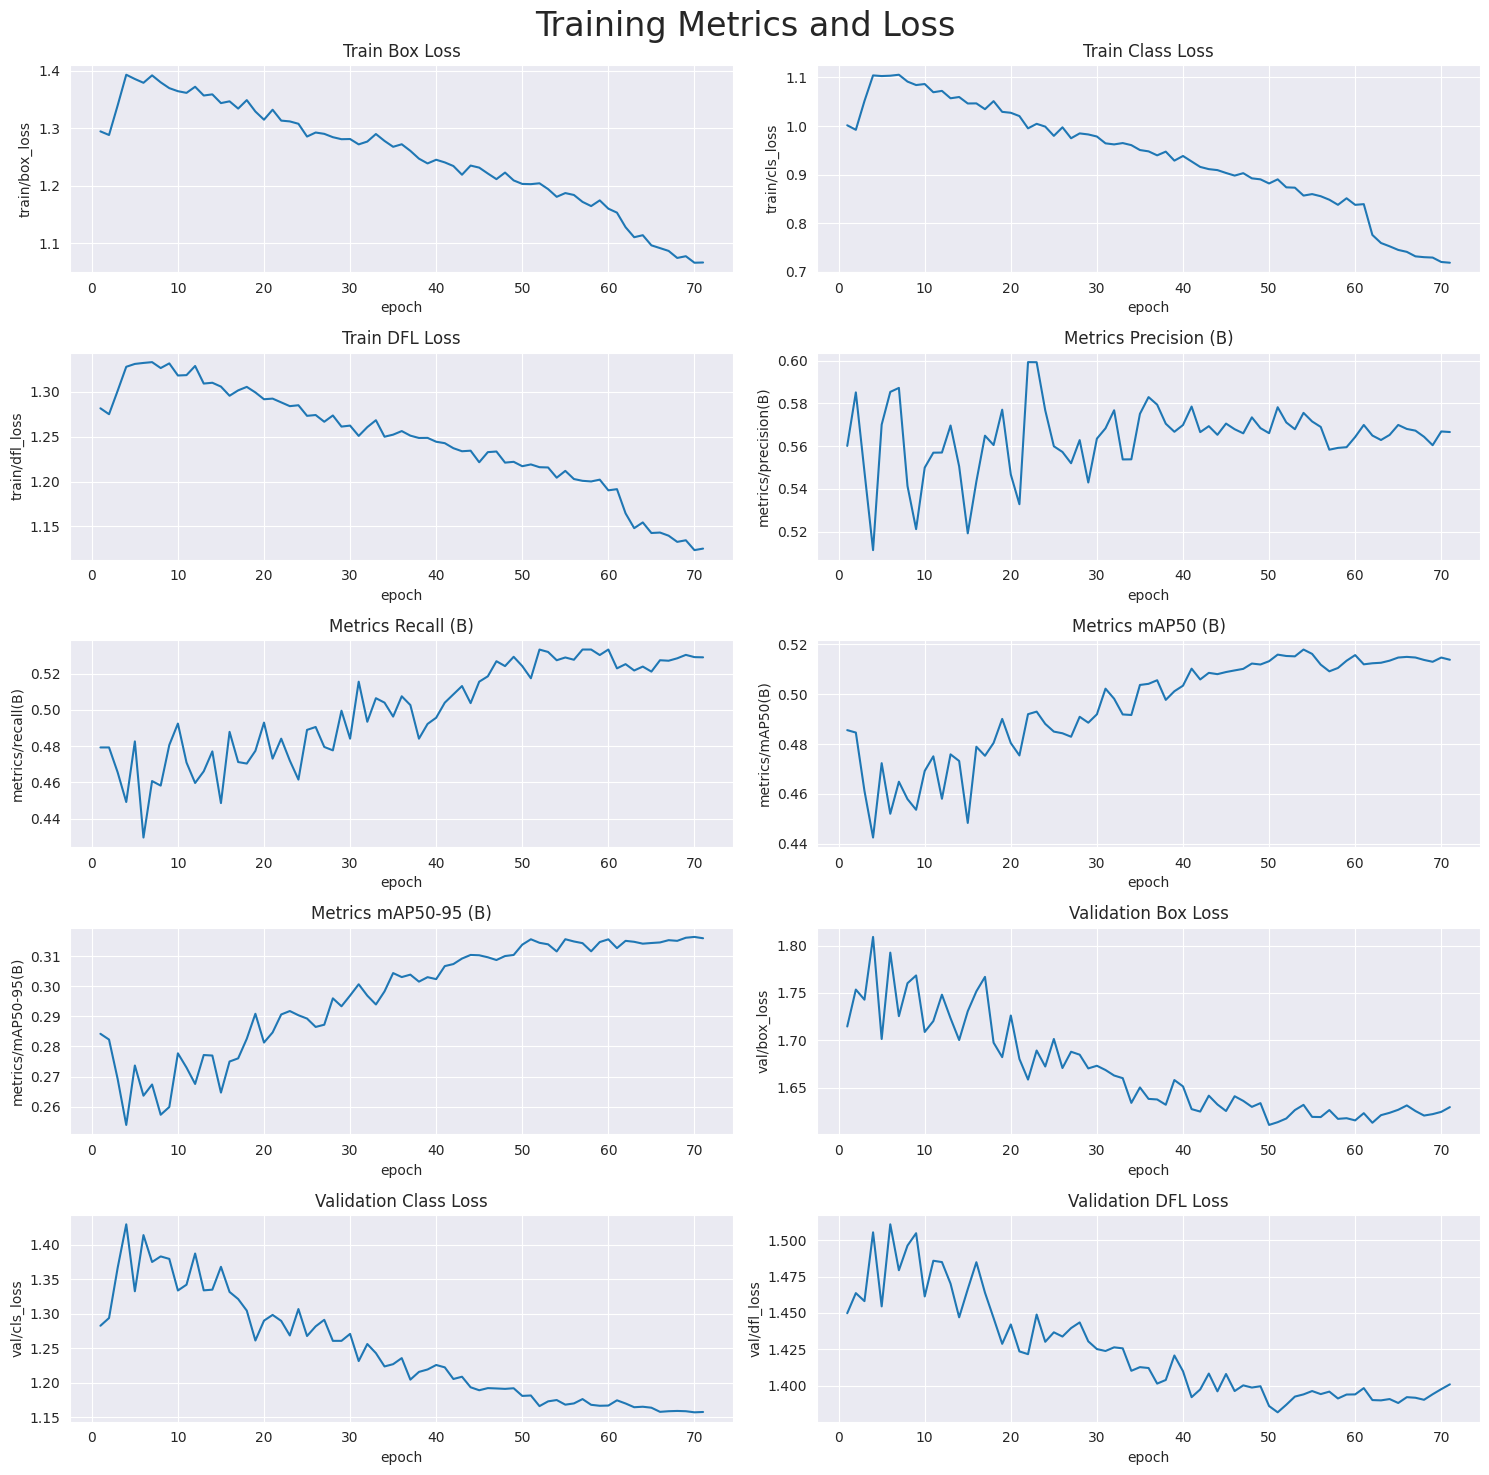

In [8]:
%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/runs/detect/train/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()


# 📊Evaluation
---

In [10]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')

# Evaluating the model on the test dataset
metrics = model.val(conf = 0.25, split = 'test')

Ultralytics YOLOv8.2.48 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/ships-in-aerial-images/ships-aerial-images/test/labels... 1573 images, 51 backgrounds, 0 corrupt: 100%|██████████| 1573/1573 [00:07<00:00, 210.10it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/ships-in-aerial-images/ships-aerial-images/test is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 106, len(boxes) = 2872. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 99/99 [00:18<00:00,  5.39it/s]


                   all       1573       2872      0.692      0.468      0.592      0.384
Speed: 0.4ms preprocess, 6.6ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/val


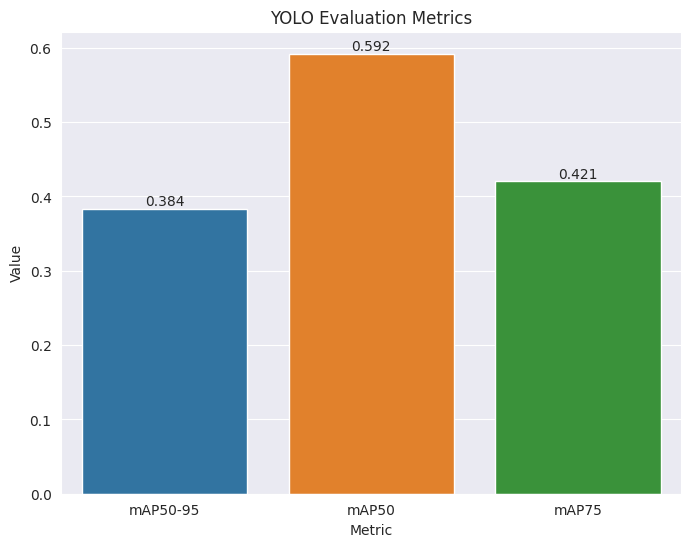

In [11]:
%matplotlib inline
# Create the barplot
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

# Set the title and axis labels
ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

# Set the figure size
fig = plt.gcf()
fig.set_size_inches(8, 6)

# Add the values on top of the bars
for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    
# Show the plot
plt.show()

<div style="background-color:#f2f2f2; padding: 20px;">
<h2>Confusion Matrix</h2>


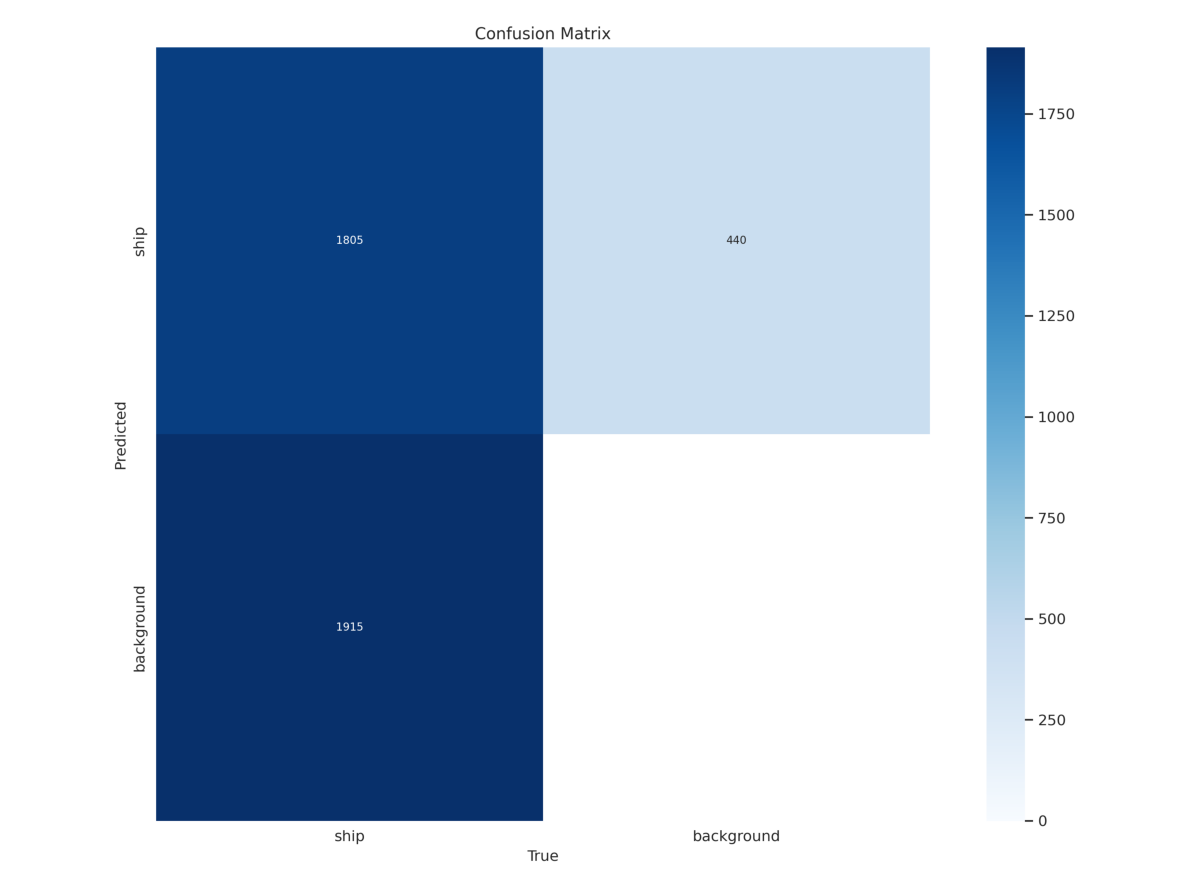

In [13]:
%matplotlib inline
# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Plotting the confusion matrix image
fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');

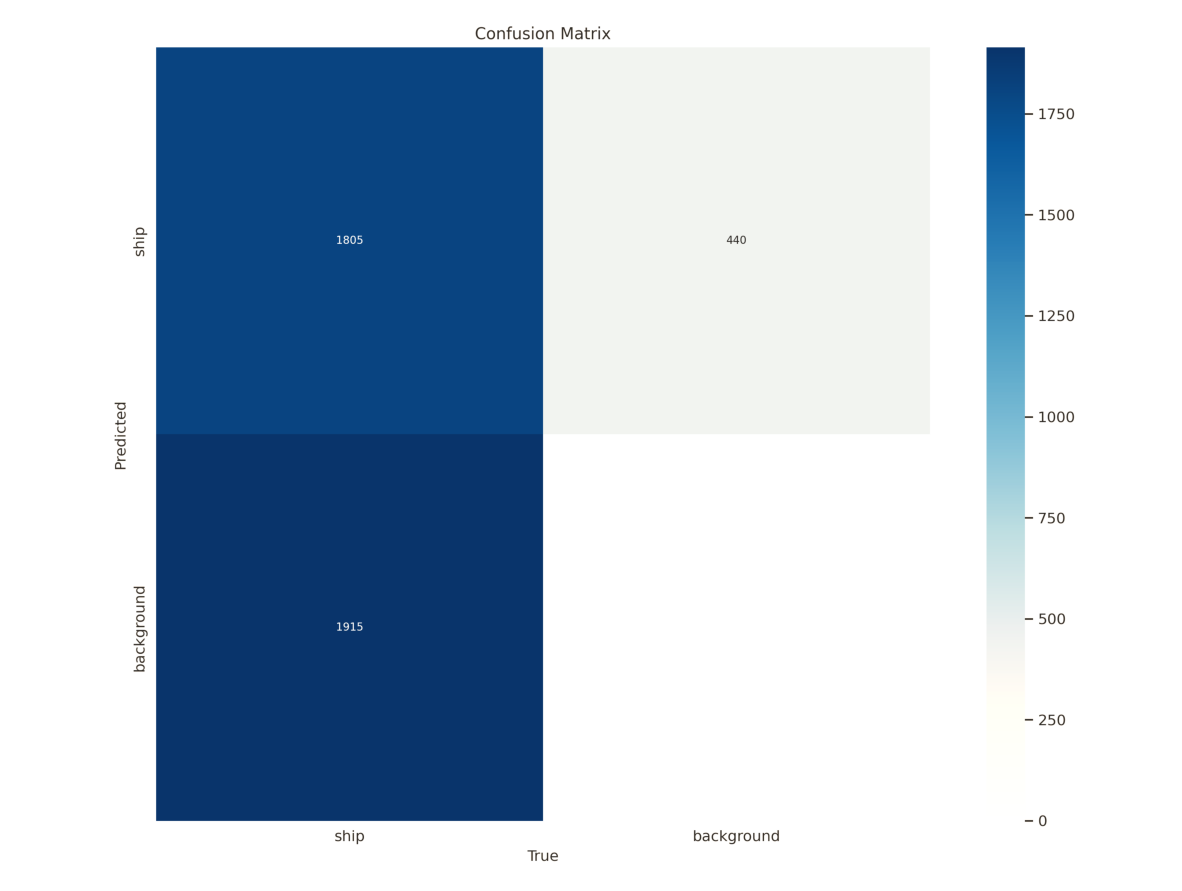

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# Reading the confusion matrix image file
img = mpimg.imread('/kaggle/working/runs/detect/train/confusion_matrix.png')

# Enhancing warmth by increasing red and green channels
img_warmer = img.copy()
img_warmer[:, :, 0] = np.clip(img_warmer[:, :, 0] * 1.2, 0, 1)  # Increase red channel
img_warmer[:, :, 1] = np.clip(img_warmer[:, :, 1] * 1.1, 0, 1)  # Increase green channel

# Plotting the confusion matrix image with warmer colors
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img_warmer)
ax.axis('off')
plt.show()


# 🔮Making Predictions on Test Images
---

In [15]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 768x768 1 ship, 8.8ms
Speed: 3.1ms preprocess, 8.8ms inference, 1.4ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 (no detections), 8.7ms
Speed: 3.3ms preprocess, 8.7ms inference, 0.5ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.7ms
Speed: 3.7ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.7ms
Speed: 3.8ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.7ms
Speed: 3.6ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.7ms
Speed: 2.9ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.7ms
Speed: 4.1ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 ship, 8.7ms
Speed: 3.3ms preprocess, 8.7ms inference, 1.2ms postprocess per image at shape (1, 3, 768, 768)

0: 768x768 1 s

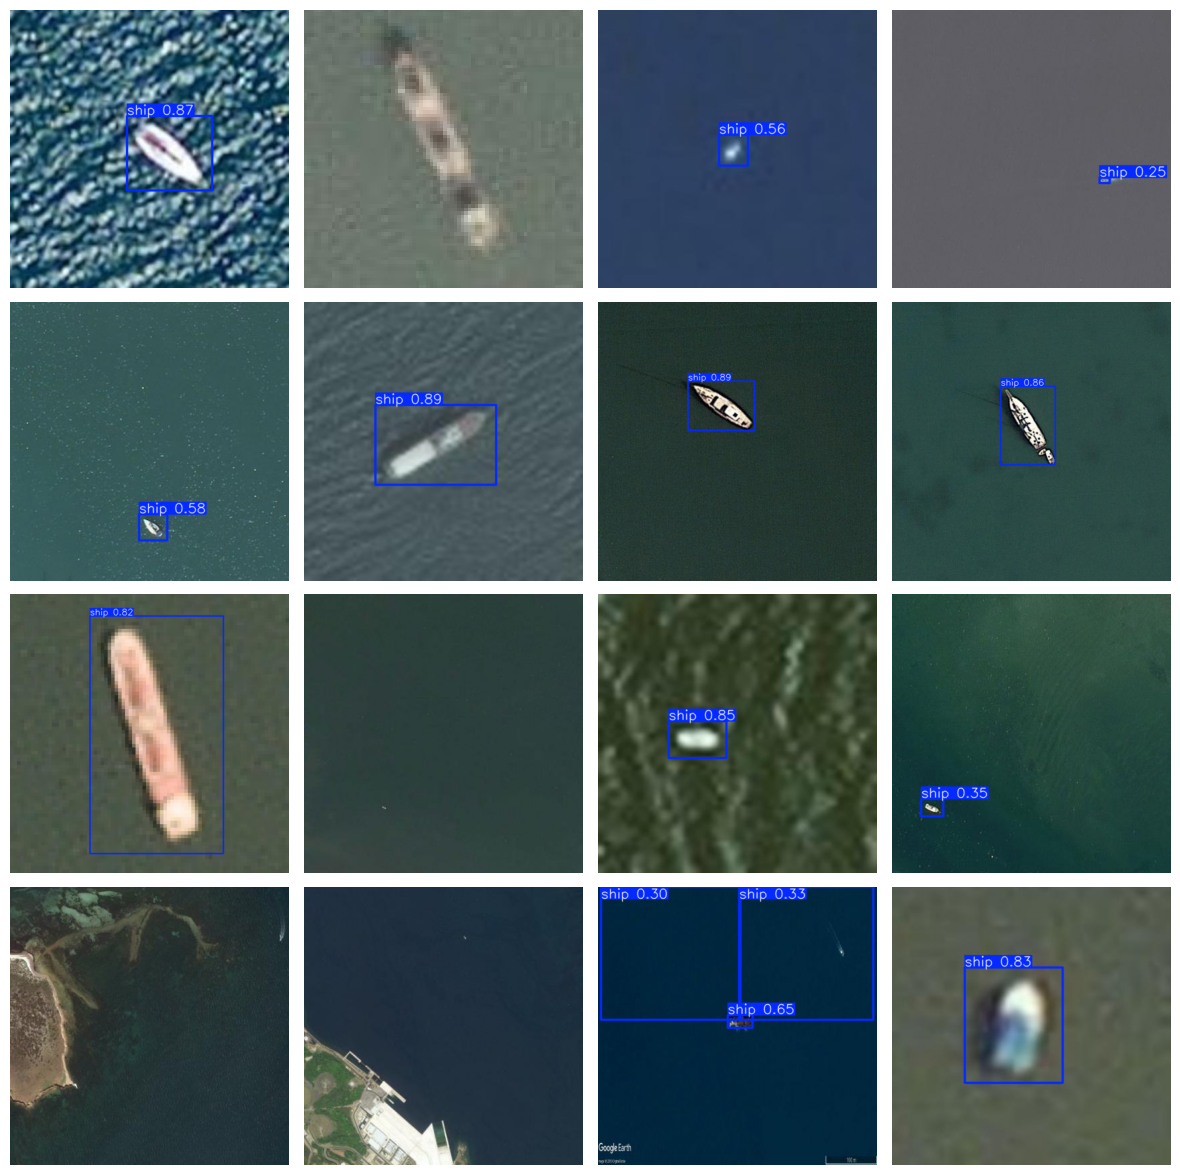

In [17]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/ships-in-aerial-images/ships-aerial-images/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)
